Shopify Winter '22 Challenge
Given: 5,000 orders, 30 day period, 
    100 shops, each of these shops sells only one model of shoe

Assumption: Every model of shoes must be the same price if sold from the same store

Start by importing useful libraries and reading the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's see some stats from this data: 

In [9]:
df = pd.read_csv('Shopify.csv')
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Here we can see the mean and median("50%") are really far apart for order_amount. The standard deviation is also very high, meaning we have a wide spread distribution in order amounts. 

This suggests there are expensive orders that are skewing the data to a higher $ value.

In [27]:
# Calculating the inncorrect method for average order value likley used
wrong_way = df.order_amount.mean()
print(wrong_way) 

3145.128


This calculation is mathematically correct but the insight it provides is far from the truth. The median we saw described could possibly be a better insight as to what a typical order would look like, $284. 

That is much more reasonable for the business context of a shoe store order compared to $3145. 

To confirm my idea of outliers causing the skew, let's continue.

In [10]:
# Taking a look at the top 50 orders by order_amount
df.nlargest(50, ['order_amount'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


# Answer 1A (summary)

In order amount, the largest orders are 704,000 confirming our outlier suspicions compared to the median of $284. 
While these orders make up a small fraction of the 5,000 total orders for this period, 
the values are skewing the Average Order Value much higher.

Since we can also see the 704,000 outliers all share a common total_items of 2,000,
we can say the shoes are reasonable when priced on an individual level:
704,000/2,000 = $352 per pair

This indicates that the high volume of total_items on these orders are the outlier causing $704,000 order_amounts.

Let's find a better way to analyze this data since we know outliers exist.
Let's discriminate from orders of extreme volume or high 'total_items'(i.e. "2,000")

In [11]:
# Adding 'avg_item_cost' column to data
# 'avg_item_cost' is the average price per item for each order or "per capita cost"
df['avg_item_cost'] = df.order_amount.divide(df.total_items) 
df.avg_item_cost.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: avg_item_cost, dtype: float64

No more extreme volume cases, but this is not my answer.
Mean is still far from median("50%")...

AHA! We found an outlier in price, according to the "max" value, an item worth $25,725 exists in the data.
This is also an extreme outlier in order_amount but this time it's not caused by total_items.

          order_amount
shop_id               
42       235101.490196
78        49213.043478
50          403.545455
90          403.224490
38          390.857143
...                ...
53          214.117647
100         213.675000
32          189.976190
2           174.327273
92          162.857143

[100 rows x 1 columns]


<AxesSubplot:ylabel='order_amount'>

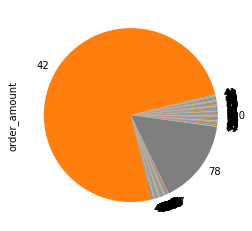

In [28]:
# To view the shops selling the most expensive items
pd.set_option('max_rows', 40)
order_amt_gb_shop = pd.DataFrame(df.groupby(['shop_id']).order_amount.mean())
print(order_amt_gb_shop.sort_values(by='order_amount', ascending = False))

# pie chart of each shop's shoe price relative to all 100 shops
order_amt_gb_shop.order_amount.plot.pie(x='order_amount', y='val', rot=0)

The list and chart confirm that shop 42 & 78 are extreme outliers in price compared to other shops. 
While these are valid items being sold, we don't want them included to hijack our metrics.

Let's exclude them by not including the top and bottom 2.5% or taking the inner 95% of our item price data.

In [40]:
# Extract order amount grouped by shop percentiles
order_amt_gb_shop_4 = np.percentile(order_amt_gb_shop, 3.5)
order_amt_gb_shop_99 = np.percentile(order_amt_gb_shop, 98.5)

# including only the inner quartile range 95% of order amounts grouped by shop
oa_gbs_iqr = df[(df['order_amount']>= order_amt_gb_shop_4) & (df['order_amount']<= order_amt_gb_shop_99)]
oa_gbs_iqr.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_item_cost
count,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000
mean,2494.936184,49.808876,848.490444,393.218659,2.573372,153.719469
std,1443.606315,28.777530,87.421487,138.018753,0.796365,30.570950
min,1.000000,1.000000,700.000000,222.000000,1.000000,90.000000
25%,1227.000000,24.000000,773.000000,296.000000,2.000000,133.000000
50%,2506.000000,50.000000,848.000000,352.000000,2.000000,153.000000
75%,3721.000000,74.000000,925.000000,468.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


# Answer 1B (summary)

# Answer 1C 

My metric's value is that it's a better representation of the majority of the data where previously the data's order amount was being skewed by including some extreme orders. 
The average of the orders from those inner 95% of stores are a more accurate depiction of the data from this period.

It is more important to look at the majority of the data not all of it. 
The inner data is there to tell a story while the outliers are the ones augmenting it.

# BONUS INSIGHT:

What is the average user spending on orders, let's take a look.

In [7]:
# organized by each user, what the avg price of the item ordered
user_avg = df.groupby('user_id').avg_item_cost.mean()
user_avg.describe()
#INSGIGHT# 301 unique users  

count     301.000000
mean      398.638568
std       612.661697
min       134.933333
25%       148.421053
50%       152.826087
75%       158.850000
max      3162.235294
Name: avg_item_cost, dtype: float64

In [36]:
#largest 14 purchases by amount
df.nlargest(14, ['order_amount'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_cost
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


The largest orders by order_amount are over 700,000 confirming our outlier suspisions compared to the median of $284. While these orders make up a small fraction of the 5,000 total orders for this period, the values are skewing the Average Order Value much higher.

Looking at the user_id column we can see that "user_id: 607" is resposible for all orders of the highest order_amount and total_items. Let's investigate...

In [20]:
# Calculating user 607's contribution to total items ordered in this period
user_607 = df[df.user_id == 607].total_items.count()/df.total_items.count()

# Calculating user 607's contribution to the total amount ordered ($) as a percentage
user_607_pct_total = df[df.user_id == 607].order_amount.sum()/df.order_amount.sum()

# Calculating user 607's contribution to the total amount ordered ($) in $
user_607_order_amount = df[df.user_id == 607].order_amount.sum()

user_607, user_607_pct_total, user_607_order_amount


(0.0034, 0.7610501067047192, 11968000)

Although this user only made up 0.0034% of all orders, they contributed 76% of all the order amount ($) generated.They purchased $11,968,000 worth of goods! Quite the shopper! 